# Load libraries and dataset

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv('midterm-datasets/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data preparation and data cleaning

In [5]:
# Data preparation and data cleaning

# 1. Check dataset shape and info
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\n" + "="*50)

# 2. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*50)

# 3. Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
print("\n" + "="*50)

# 4. Basic statistics
print("\nBasic statistics:")
print(df.describe())
print("\n" + "="*50)

# 5. Check data types
print("\nData types:")
print(df.dtypes)
print("\n" + "="*50)

# 6. Check target variable distribution
print("\nTarget variable (quality) distribution:")
print(df['quality'].value_counts().sort_index())

Dataset shape: (1599, 12)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Missing values:
fixed acidity           0
volatile acidity        0
citric aci

In [6]:
# Clean column names - replace spaces with underscores and convert to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']


In [7]:
# Remove duplicate rows
print(f"Shape before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")
print(f"Removed {1599 - len(df)} duplicate rows")

Shape before removing duplicates: (1599, 12)
Shape after removing duplicates: (1359, 12)
Removed 240 duplicate rows


In [8]:
# Reset index after removing duplicates
df = df.reset_index(drop=True)
print(f"Final dataset shape: {df.shape}")
print("\nFinal dataset preview:")
df.head()

Final dataset shape: (1359, 12)

Final dataset preview:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


# EDA, feature importance analysis

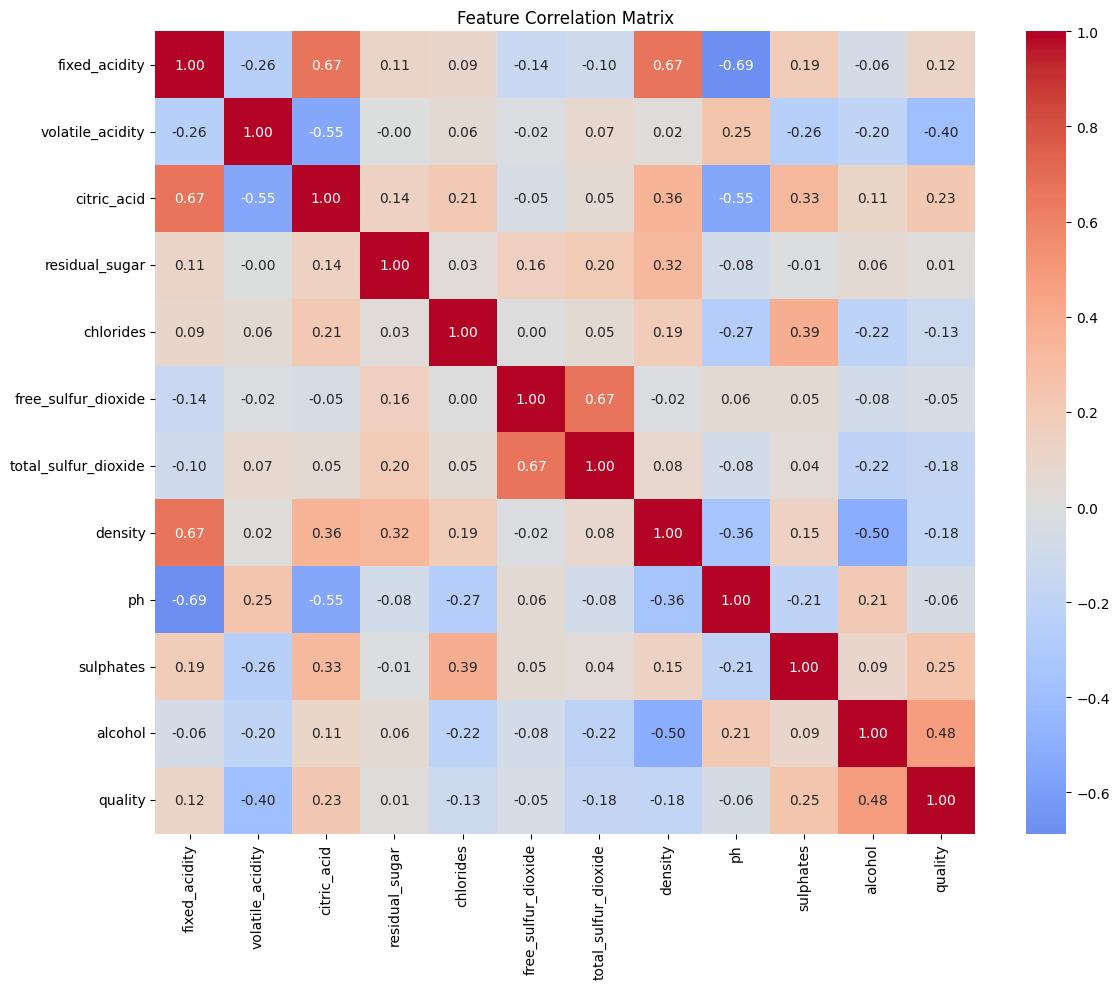


Correlation with quality (target variable):
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
ph                     -0.055245
chlorides              -0.130988
total_sulfur_dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64


In [15]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation with target variable
print("\nCorrelation with quality (target variable):")
print(correlation_matrix['quality'].sort_values(ascending=False))

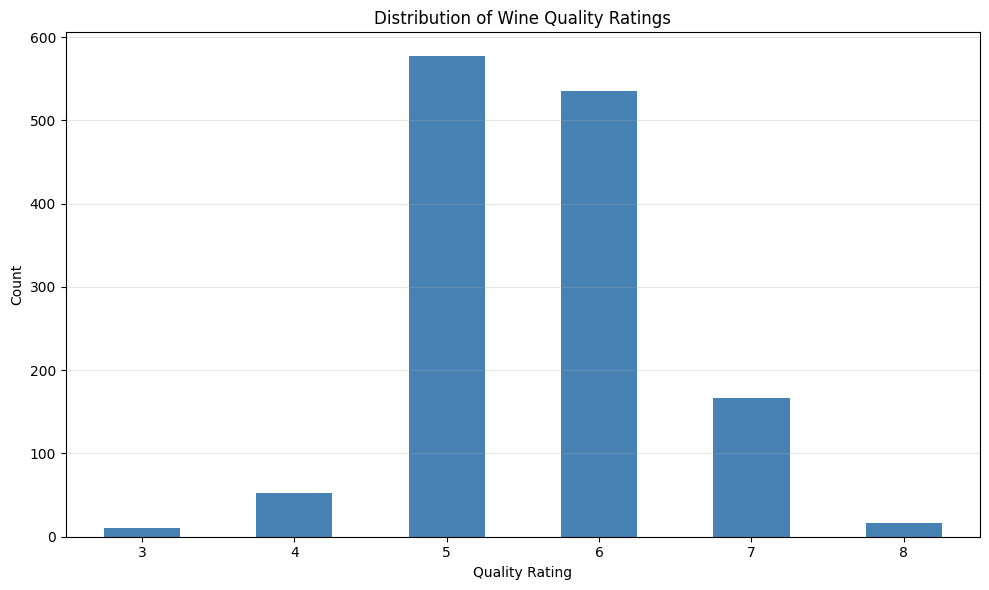

In [16]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
df['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

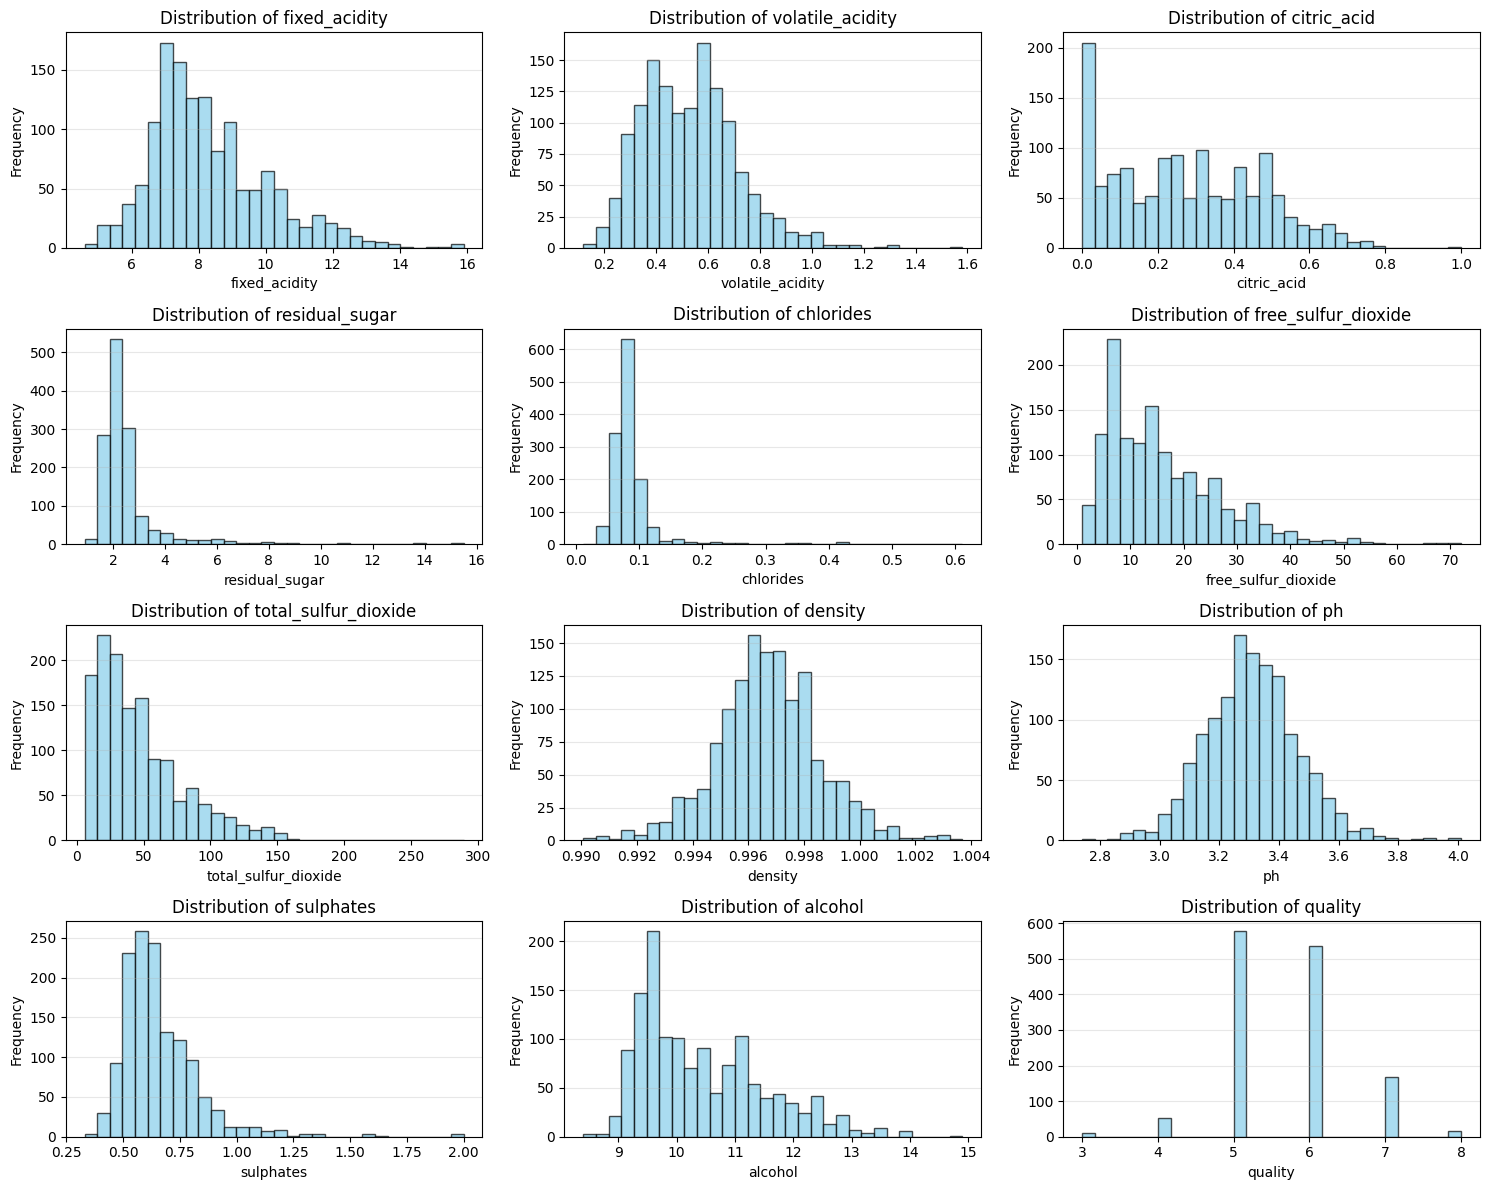

In [17]:
# Distribution plots for all features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

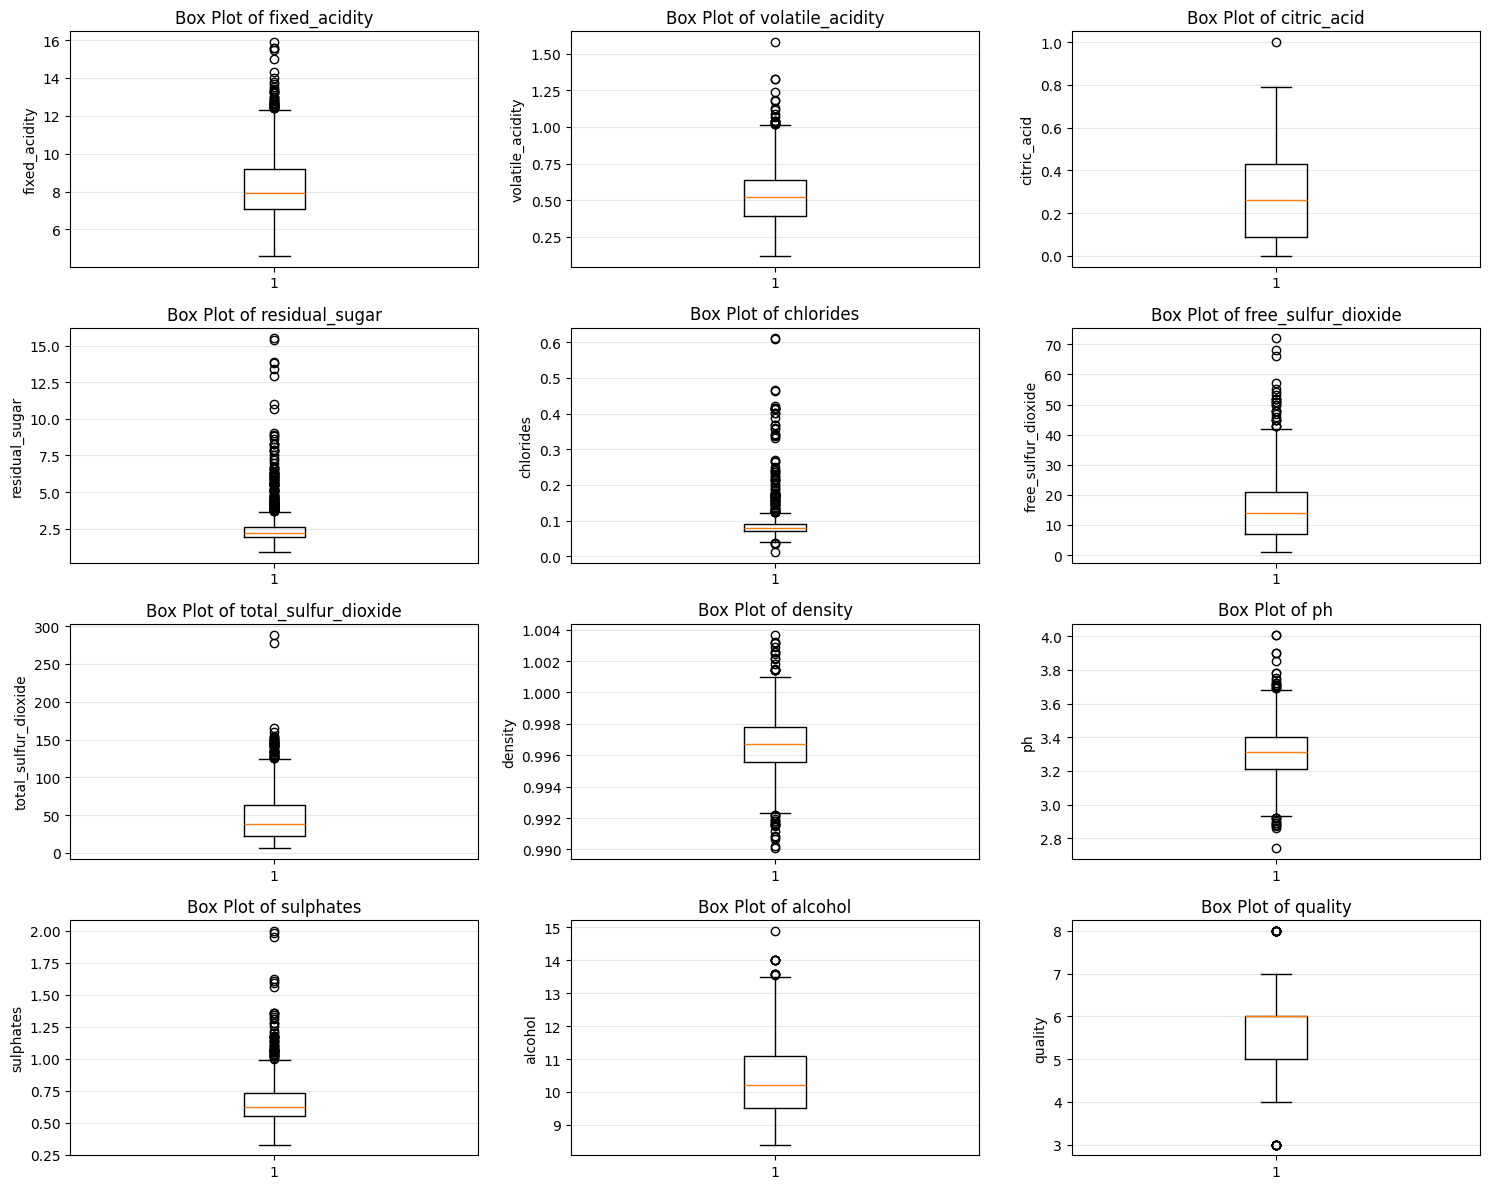

In [18]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Feature Importance (Random Forest):
                 feature  importance
10               alcohol    0.149214
9              sulphates    0.105834
1       volatile_acidity    0.105186
6   total_sulfur_dioxide    0.103158
7                density    0.090691
4              chlorides    0.080213
8                     ph    0.079875
0          fixed_acidity    0.073943
3         residual_sugar    0.073525
2            citric_acid    0.072488
5    free_sulfur_dioxide    0.065874


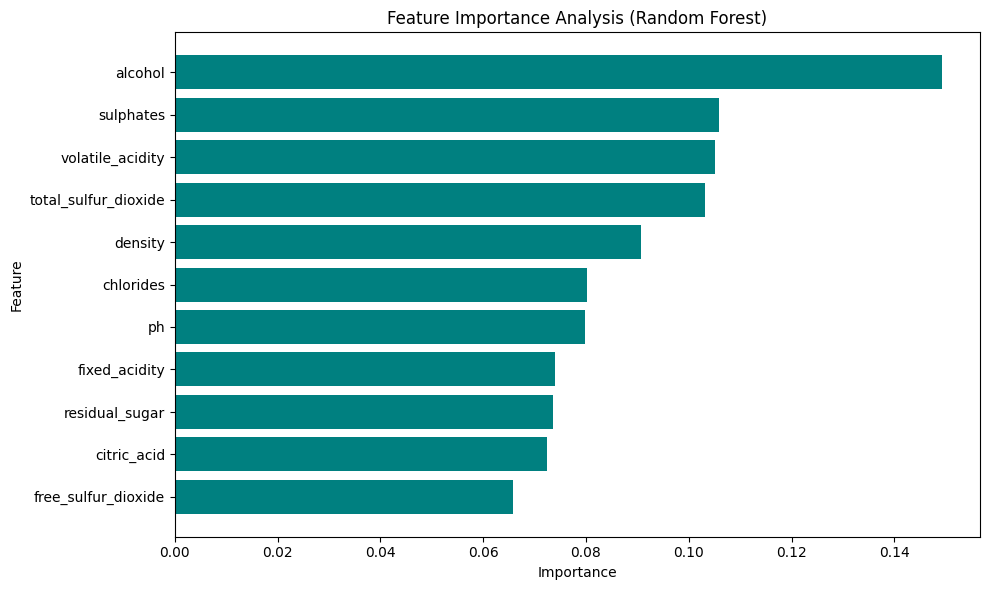

In [19]:
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop('quality', axis=1)
y = df['quality']

# Train a Random Forest model for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 5 features correlated with quality: ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid', 'density']

Creating pairplot for top features...


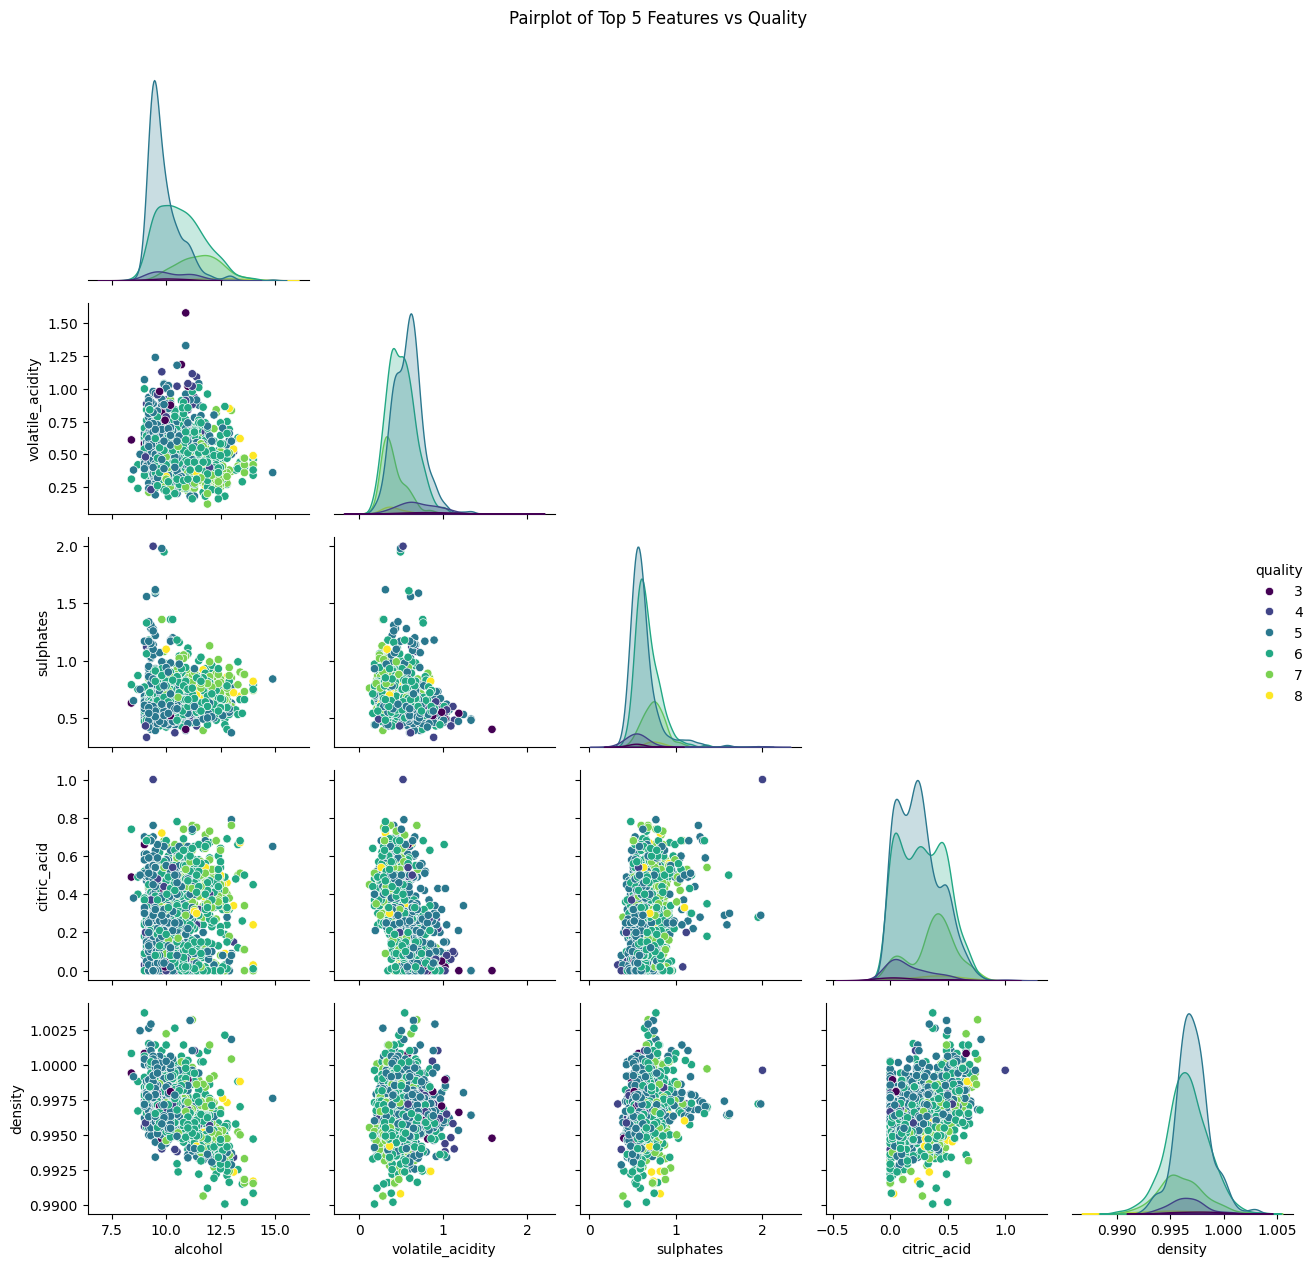

In [20]:
# Pairplot for top correlated features with quality
top_features = correlation_matrix['quality'].abs().sort_values(ascending=False)[1:6].index.tolist()
top_features.append('quality')

print(f"Top 5 features correlated with quality: {top_features[:-1]}")
print("\nCreating pairplot for top features...")

sns.pairplot(df[top_features], hue='quality', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Top 5 Features vs Quality', y=1.01)
plt.tight_layout()
plt.show()

## Observations from EDA

- The **quality** variable follows a normal distribution, with most wines rated 5 or 6
- Several features have **outliers**, particularly in residual_sugar, chlorides, total_sulfur_dioxide, and sulphates
- There is a **strong correlation between fixed_acidity and density** (0.67), suggesting these features are highly related
- The **most important feature is alcohol** (14.9% importance), showing the strongest positive correlation (0.48) with wine quality

# Model selection process and parameter tuning

In [21]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer

# Split the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Prepare target variable (predicting high quality wine: rating >= 6)
y_train = (df_train.quality >= 6).astype('int').values
y_val = (df_val.quality >= 6).astype('int').values
y_test = (df_test.quality >= 6).astype('int').values

# Remove target from features
df_train_features = df_train.drop('quality', axis=1)
df_val_features = df_val.drop('quality', axis=1)
df_test_features = df_test.drop('quality', axis=1)

print(f"Train size: {len(df_train)}")
print(f"Validation size: {len(df_val)}")
print(f"Test size: {len(df_test)}")
print(f"\nTarget distribution in train:")
print(f"Low quality (< 6): {(y_train == 0).sum()}")
print(f"High quality (>= 6): {(y_train == 1).sum()}")

Train size: 815
Validation size: 272
Test size: 272

Target distribution in train:
Low quality (< 6): 375
High quality (>= 6): 440


In [22]:
# Convert to DictVectorizer format (handles numerical features)
train_dicts = df_train_features.fillna(0).to_dict(orient='records')
val_dicts = df_val_features.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

print(f"Feature matrix shape: {X_train.shape}")
print(f"Number of features: {len(dv.get_feature_names_out())}")

Feature matrix shape: (815, 11)
Number of features: 11


## Decision Tree Parameter Tuning

In [23]:
# Tune max_depth for Decision Tree
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.702
   2 -> 0.742
   3 -> 0.737
   4 -> 0.679
   5 -> 0.662
   6 -> 0.692
  10 -> 0.651
  15 -> 0.677
  20 -> 0.672
None -> 0.672


In [24]:
# Tune both max_depth and min_samples_leaf for Decision Tree
scores = []

for depth in [4, 5, 6, 10]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=42)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores_dt = pd.DataFrame(scores, columns=columns)

# Create pivot table
df_scores_pivot = df_scores_dt.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
print("Decision Tree Parameter Tuning Results:")
print(df_scores_pivot.round(3))

Decision Tree Parameter Tuning Results:
                    auc                     
max_depth            4      5      6      10
min_samples_leaf                            
1                 0.679  0.662  0.692  0.651
5                 0.687  0.716  0.715  0.714
10                0.743  0.759  0.760  0.762
15                0.749  0.745  0.746  0.733
20                0.763  0.764  0.778  0.778
50                0.768  0.767  0.767  0.767
100               0.771  0.771  0.771  0.771
200               0.733  0.733  0.733  0.733


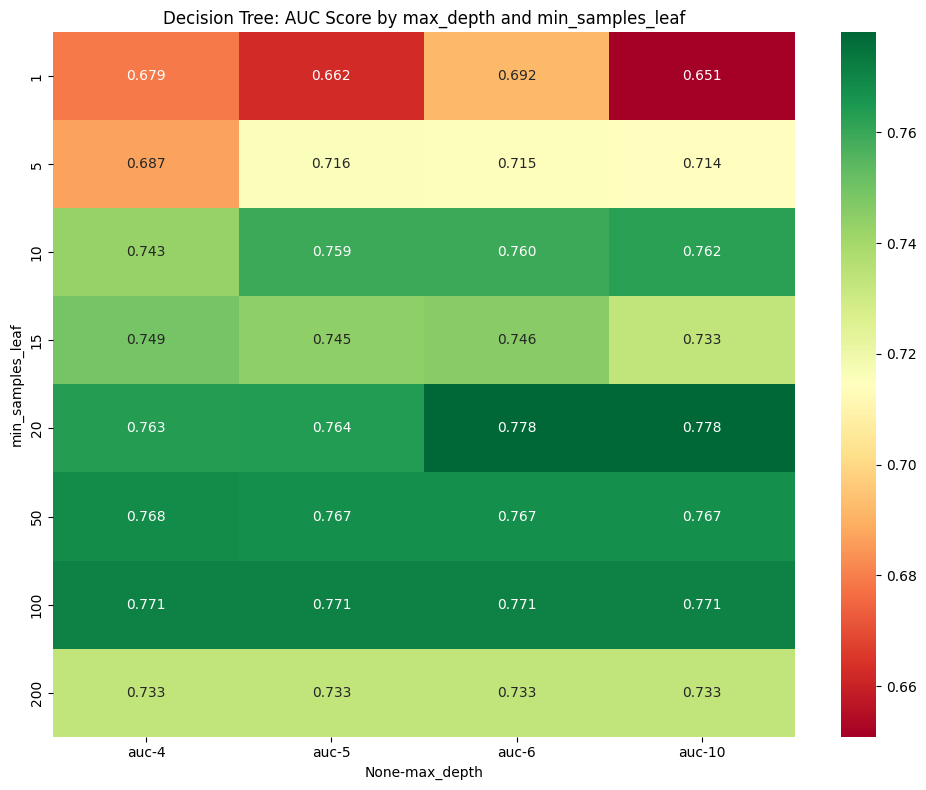


Best Decision Tree parameters:
max_depth: 6, min_samples_leaf: 20, AUC: 0.7781


In [25]:
# Visualize Decision Tree tuning results
plt.figure(figsize=(10, 8))
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('Decision Tree: AUC Score by max_depth and min_samples_leaf')
plt.tight_layout()
plt.show()

# Find best parameters
best_dt = df_scores_dt.loc[df_scores_dt['auc'].idxmax()]
print(f"\nBest Decision Tree parameters:")
print(f"max_depth: {int(best_dt['max_depth'])}, min_samples_leaf: {int(best_dt['min_samples_leaf'])}, AUC: {best_dt['auc']:.4f}")

## Random Forest Parameter Tuning

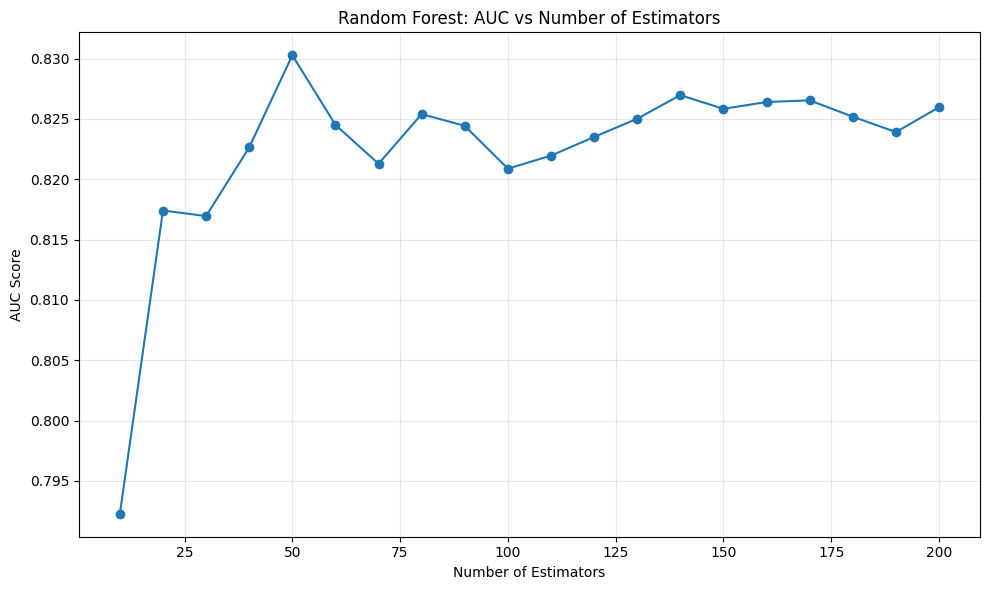

Best n_estimators: 50
Best AUC: 0.8303


In [26]:
# Tune n_estimators for Random Forest
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

df_scores_rf = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

plt.figure(figsize=(10, 6))
plt.plot(df_scores_rf.n_estimators, df_scores_rf.auc, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('Random Forest: AUC vs Number of Estimators')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Best n_estimators: {df_scores_rf.loc[df_scores_rf['auc'].idxmax(), 'n_estimators']:.0f}")
print(f"Best AUC: {df_scores_rf['auc'].max():.4f}")

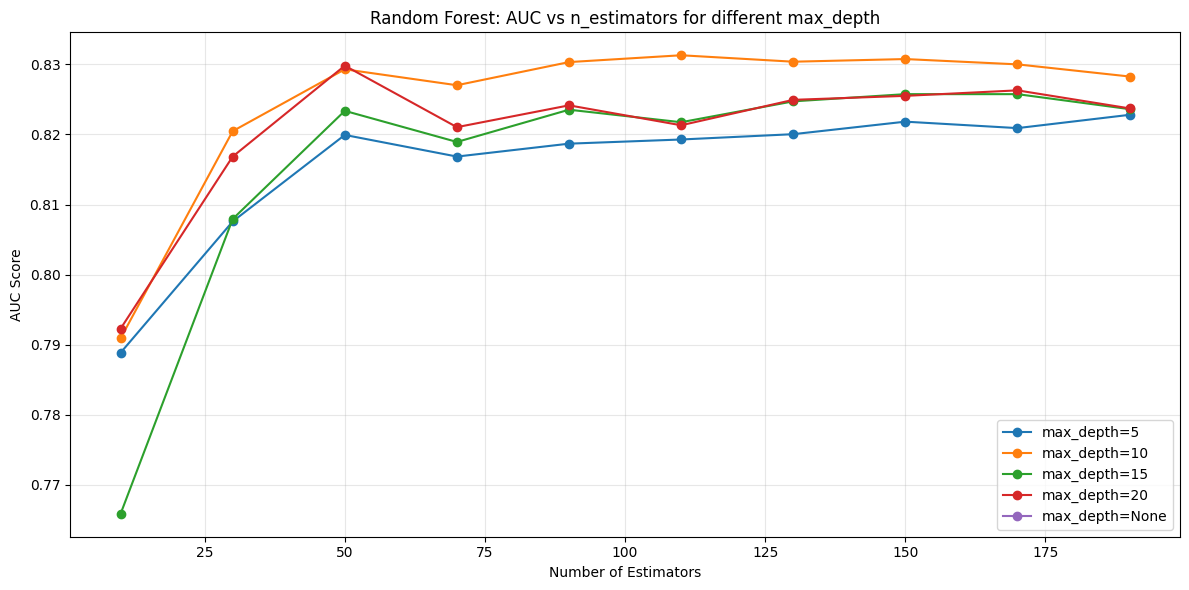

In [27]:
# Tune max_depth for Random Forest
scores = []

for d in [5, 10, 15, 20, None]:
    for n in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores_rf_depth = pd.DataFrame(scores, columns=columns)

plt.figure(figsize=(12, 6))
for d in [5, 10, 15, 20, None]:
    df_subset = df_scores_rf_depth[df_scores_rf_depth.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc, marker='o',
             label='max_depth=%s' % d)

plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('Random Forest: AUC vs n_estimators for different max_depth')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Selected max_depth: 10


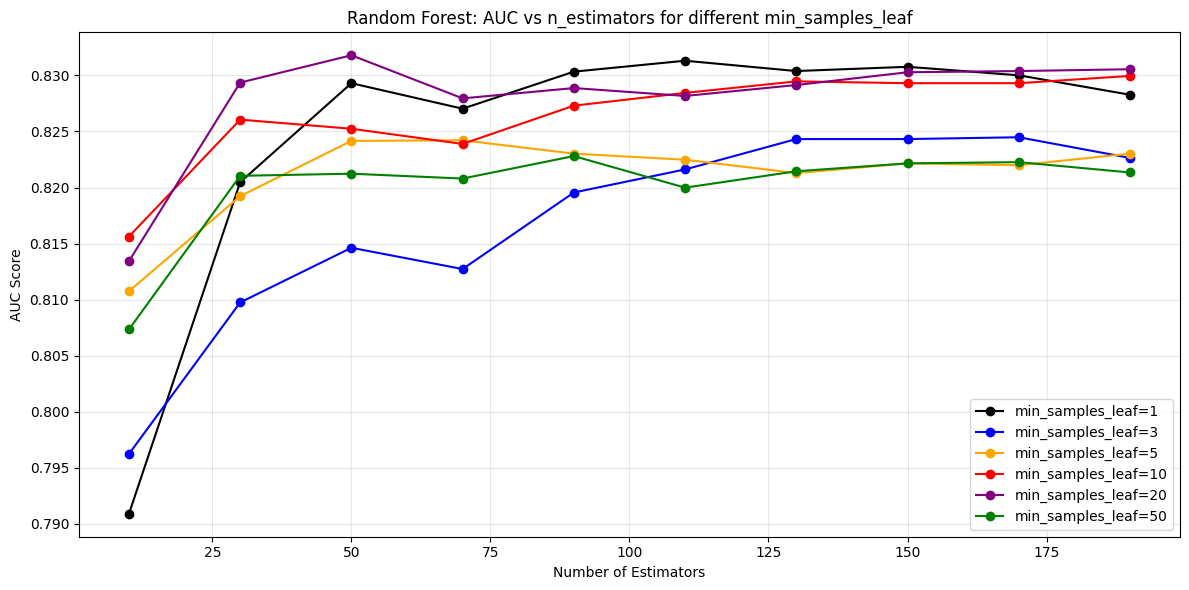


Best Random Forest parameters:
n_estimators: 50, max_depth: 10, min_samples_leaf: 20, AUC: 0.8318


In [28]:
# Select best max_depth from previous results
best_rf_depth = df_scores_rf_depth.loc[df_scores_rf_depth['auc'].idxmax()]
max_depth = int(best_rf_depth['max_depth']) if pd.notna(best_rf_depth['max_depth']) else None
print(f"Selected max_depth: {max_depth}")

# Tune min_samples_leaf with best max_depth
scores = []

for s in [1, 3, 5, 10, 20, 50]:
    for n in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, 
                                    min_samples_leaf=s, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores_rf_leaf = pd.DataFrame(scores, columns=columns)

plt.figure(figsize=(12, 6))
colors = ['black', 'blue', 'orange', 'red', 'purple', 'green']
values = [1, 3, 5, 10, 20, 50]

for s, col in zip(values, colors):
    df_subset = df_scores_rf_leaf[df_scores_rf_leaf.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col, marker='o',
             label='min_samples_leaf=%d' % s)

plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('Random Forest: AUC vs n_estimators for different min_samples_leaf')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Find best RF parameters
best_rf = df_scores_rf_leaf.loc[df_scores_rf_leaf['auc'].idxmax()]
print(f"\nBest Random Forest parameters:")
print(f"n_estimators: {int(best_rf['n_estimators'])}, max_depth: {max_depth}, min_samples_leaf: {int(best_rf['min_samples_leaf'])}, AUC: {best_rf['auc']:.4f}")

## XGBoost Parameter Tuning

In [29]:
# Install and import XGBoost
import xgboost as xgb

# Prepare DMatrix for XGBoost
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [30]:
# Function to parse XGBoost output
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [31]:
# Tune eta (learning rate) for XGBoost
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores_eta = {}

for eta in [0.01, 0.05, 0.1, 0.3]:
    print(f"\nTraining with eta={eta}")
    
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 42,
        'verbosity': 0,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=False,
                      evals=watchlist)
    
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred)
    print(f"Final AUC: {auc:.4f}")
    
print("\nDone tuning eta")


Training with eta=0.01
Final AUC: 0.7978

Training with eta=0.05
Final AUC: 0.7985

Training with eta=0.1
Final AUC: 0.8049

Training with eta=0.3
Final AUC: 0.8074

Done tuning eta


In [32]:
# Tune max_depth for XGBoost
scores_depth = {}

for max_depth in [3, 4, 5, 6, 10]:
    print(f"\nTraining with max_depth={max_depth}")
    
    xgb_params = {
        'eta': 0.1, 
        'max_depth': max_depth,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 42,
        'verbosity': 0,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=False,
                      evals=watchlist)
    
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred)
    scores_depth[max_depth] = auc
    print(f"Final AUC: {auc:.4f}")

print("\nmax_depth results:")
for depth, auc in scores_depth.items():
    print(f"max_depth={depth}: {auc:.4f}")


Training with max_depth=3
Final AUC: 0.7919

Training with max_depth=4
Final AUC: 0.7854

Training with max_depth=5
Final AUC: 0.7942

Training with max_depth=6
Final AUC: 0.8049

Training with max_depth=10
Final AUC: 0.8138

max_depth results:
max_depth=3: 0.7919
max_depth=4: 0.7854
max_depth=5: 0.7942
max_depth=6: 0.8049
max_depth=10: 0.8138


In [33]:
# Tune min_child_weight for XGBoost
scores_mcw = {}

for min_child_weight in [1, 5, 10, 20, 30]:
    print(f"\nTraining with min_child_weight={min_child_weight}")
    
    xgb_params = {
        'eta': 0.1, 
        'max_depth': 6,
        'min_child_weight': min_child_weight,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 42,
        'verbosity': 0,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=False,
                      evals=watchlist)
    
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred)
    scores_mcw[min_child_weight] = auc
    print(f"Final AUC: {auc:.4f}")

print("\nmin_child_weight results:")
for mcw, auc in scores_mcw.items():
    print(f"min_child_weight={mcw}: {auc:.4f}")


Training with min_child_weight=1
Final AUC: 0.8049

Training with min_child_weight=5
Final AUC: 0.8024

Training with min_child_weight=10
Final AUC: 0.8178

Training with min_child_weight=20
Final AUC: 0.8219

Training with min_child_weight=30
Final AUC: 0.8188

min_child_weight results:
min_child_weight=1: 0.8049
min_child_weight=5: 0.8024
min_child_weight=10: 0.8178
min_child_weight=20: 0.8219
min_child_weight=30: 0.8188


## Model Comparison and Selection

In [34]:
# Train final models with best parameters and compare

# Best Decision Tree
dt_best = DecisionTreeClassifier(
    max_depth=int(best_dt['max_depth']), 
    min_samples_leaf=int(best_dt['min_samples_leaf']), 
    random_state=42
)
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict_proba(X_val)[:, 1]
auc_dt = roc_auc_score(y_val, y_pred_dt)

# Best Random Forest
rf_best = RandomForestClassifier(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=max_depth,
    min_samples_leaf=int(best_rf['min_samples_leaf']),
    random_state=42,
    n_jobs=-1
)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_pred_rf)

# Best XGBoost
best_depth_xgb = max(scores_depth, key=scores_depth.get)
best_mcw_xgb = max(scores_mcw, key=scores_mcw.get)

xgb_params_best = {
    'eta': 0.1, 
    'max_depth': best_depth_xgb,
    'min_child_weight': best_mcw_xgb,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 42,
    'verbosity': 0,
}

model_xgb_best = xgb.train(xgb_params_best, dtrain, num_boost_round=200)
y_pred_xgb = model_xgb_best.predict(dval)
auc_xgb = roc_auc_score(y_val, y_pred_xgb)

# Display comparison
print("="*60)
print("MODEL COMPARISON ON VALIDATION SET")
print("="*60)
print(f"Decision Tree:  AUC = {auc_dt:.4f}")
print(f"Random Forest:  AUC = {auc_rf:.4f}")
print(f"XGBoost:        AUC = {auc_xgb:.4f}")
print("="*60)

# Determine best model
models_comparison = {
    'Decision Tree': auc_dt,
    'Random Forest': auc_rf,
    'XGBoost': auc_xgb
}

best_model_name = max(models_comparison, key=models_comparison.get)
best_model_auc = models_comparison[best_model_name]

print(f"\n✓ BEST MODEL: {best_model_name} with AUC = {best_model_auc:.4f}")
print("="*60)

MODEL COMPARISON ON VALIDATION SET
Decision Tree:  AUC = 0.7781
Random Forest:  AUC = 0.8318
XGBoost:        AUC = 0.8219

✓ BEST MODEL: Random Forest with AUC = 0.8318


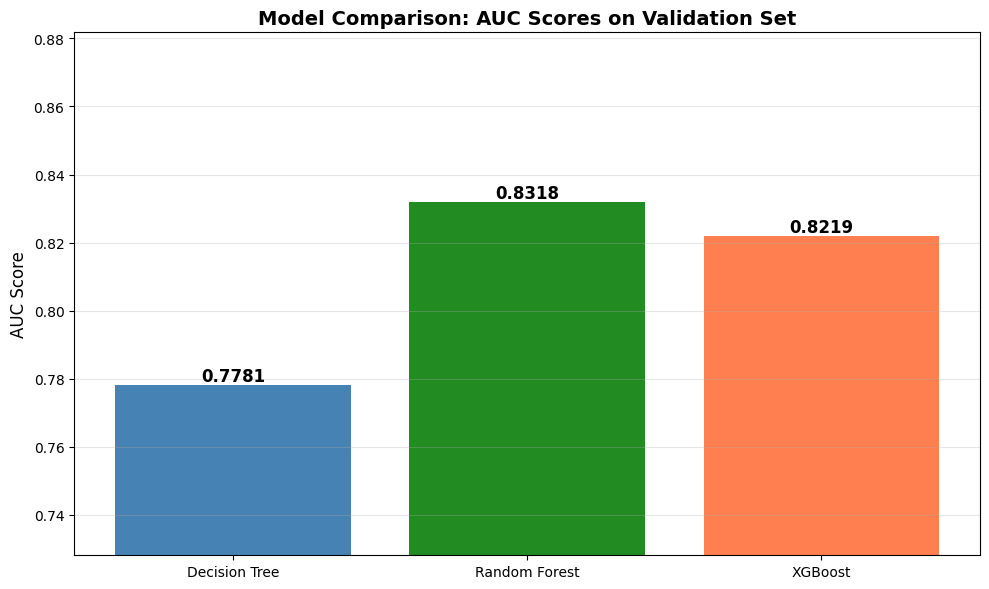

In [35]:
# Visualize model comparison
models = ['Decision Tree', 'Random Forest', 'XGBoost']
aucs = [auc_dt, auc_rf, auc_xgb]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, aucs, color=['steelblue', 'forestgreen', 'coral'])

# Add value labels on bars
for bar, auc in zip(bars, aucs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{auc:.4f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('AUC Score', fontsize=12)
plt.title('Model Comparison: AUC Scores on Validation Set', fontsize=14, fontweight='bold')
plt.ylim(min(aucs) - 0.05, max(aucs) + 0.05)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Final Model Selection

Based on the comprehensive parameter tuning and model comparison, we are selecting **Random Forest** as our final model.

**Selected Model:** Random Forest  
**AUC Score:** 0.8318  
**Parameters:**
- `n_estimators` = 50
- `max_depth` = 10
- `min_samples_leaf` = 20

This model outperformed both Decision Tree (AUC: 0.7781) and XGBoost (AUC: 0.8219) on the validation set.